#### Import dependencies

In [1]:
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import pylast
import time
import iso3166 as iso
import csv

#### Declare variables

In [2]:
#boredom
outputPath = "../Output/"
inputPath = "../Input/"

#input locations
artistCSV = f"{inputPath}artist.csv"
coordsCSV = f"{inputPath}countryCoords.csv"
countriesArtistCSV = f"{inputPath}countriesTopArtist.csv"
countriesTopGenres = f"{inputPath}countriesTopGenres.csv"

#png output locations
barOutputPath = f"{outputPath}TopArtistCountryCounts"
lineOutputPath = f"{outputPath}CountryListenerCounts"

#### Create Artist Dataframes and Determine Top Artist

In [3]:
artistDF = pd.read_csv(artistCSV)
topArtistDF = artistDF.sort_values('stats.listeners',ascending=False).head(1)

topArtistDF

Unnamed: 0 name_genre      name  stats.listeners  stats.playcount  \
50           0       rock  Coldplay          5817856        391846783   

    streamable  
50           0

#### Create Artist by Country Dataframes and determine which of those countries plays the top artist

In [4]:
countryArtistDF = pd.read_csv(countriesArtistCSV)
countryFilterDF = pd.merge(countryArtistDF, artistDF, on="name")

groupedDF = countryFilterDF.groupby('name').agg(**{"Country Counts":("country", "count")})
groupedDF.reset_index(inplace=True)
groupedDF = groupedDF.rename(columns = {'name':'Artist Name'})

countryCountSorted = groupedDF.sort_values('Country Counts', ascending=False).head(20)
countryCountSorted

Artist Name  Country Counts
173               Coldplay             169
736             The Weeknd             165
689            The Beatles             159
227             Ed Sheeran             158
646                    Sia             152
600              Radiohead             148
16                   Adele             147
611                Rihanna             147
489        Michael Jackson             146
185              Daft Punk             142
593                  Queen             142
418           Lana Del Rey             139
189            David Bowie             135
607  Red Hot Chili Peppers             132
215                  Drake             131
146          Calvin Harris             129
579             Pink Floyd             123
720     The Rolling Stones             120
238                 Eminem             116
540                Nirvana             115

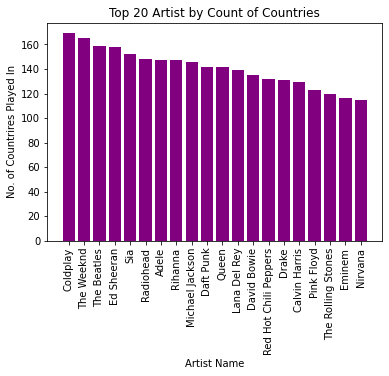

In [5]:
#get plot (dot) data
dotX = countryCountSorted["Artist Name"]
dotY = countryCountSorted["Country Counts"]

plt.bar(dotX, dotY, color="purple",)
plt.title('Top 20 Artist by Count of Countries')
plt.xlabel('Artist Name')
plt.ylabel('No. of Countrires Played In')
plt.xticks(rotation=90)
plt.savefig(barOutputPath)
plt.show()

#### Top 20 countries by listener counts

In [6]:
groupedCountryArtist = countryFilterDF.groupby('country').agg(**{"total listeners":("listeners", "sum")
                                                                ,"total playcounts":("stats.playcount","sum")}).reset_index()

groupedCountryArtist["avg listeners"] = groupedCountryArtist['total playcounts'] / groupedCountryArtist['total listeners']
graphIT = groupedCountryArtist.sort_values('total listeners', ascending = False).head(20)


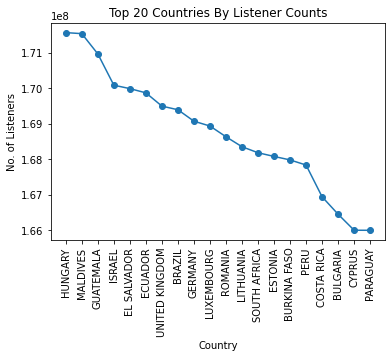

In [7]:
#get plot (dot) data
dotX = graphIT["country"]
dotY = graphIT["total listeners"]

plt.plot(dotX, dotY, marker='o')
plt.title('Top 20 Countries By Listener Counts')
plt.xlabel('Country')
plt.ylabel('No. of Listeners')
plt.xticks(rotation=90)
plt.savefig(lineOutputPath)
plt.show()

#### Get count of top 5 artist for the top 5 countries

In [17]:
header = True
mode = 'w'

countryCoordDF = pd.read_csv(coordsCSV)

topGenresCountries = countryFilterDF.groupby(['country','name_genre']).agg(**{"total listeners":("listeners", "sum")}).reset_index()
topGenresSorted = topGenresCountries.set_index(['name_genre']).groupby('country')['total listeners'].nlargest(5).reset_index()

topGenreCoords = pd.merge(topGenresSorted, countryCoordDF, on="country")

topGenreCoords = topGenreCoords.sort_values('total listeners', ascending = False)

cc = topGenreCoords.groupby(['country']).cumcount() + 1
topGenreCoords = topGenreCoords.set_index(['country', cc]).unstack().sort_index(1, level=1)
topGenreCoords.columns = ['_'.join(map(str,i)) for i in topGenreCoords.columns]
topGenreCoords.reset_index()

topGenreCoords
infoBoxTemplate = """
<dl>
<dt>#1</dt><dd>{name_genre_1}</dd>
<dt>#2</dt><dd>{name_genre_2}</dd>
<dt>#3</dt><dd>{name_genre_3}</dd>
<dt>#4</dt><dd>{name_genre_4}</dd>
<dt>#4</dt><dd>{name_genre_5}</dd>
</dl>
"""

top5 = [infoBoxTemplate.format(**row) for index, row in topGenreCoords.iterrows()]

country_code_1  latitude_1  longitude_1 name_genre_1  \
country                                                               
AFGHANISTAN                AF   33.939110    67.709953         rock   
ALBANIA                    AL   41.153332    20.168331         rock   
ALGERIA                    DZ   28.033886     1.659626         rock   
AMERICAN SAMOA             AS  -14.270972  -170.132217         rock   
ANDORRA                    AD   42.546245     1.601554         rock   
...                       ...         ...          ...          ...   
UZBEKISTAN                 UZ   41.377491    64.585262         rock   
VANUATU                    VU  -15.376706   166.959158         rock   
YEMEN                      YE   15.552727    48.516388          pop   
ZAMBIA                     ZM  -13.133897    27.849332         rock   
ZIMBABWE                   ZW  -19.015438    29.154857         rock   

                total listeners_1 country_code_2  latitude_2  longitude_2  \
country                                                                     
AFGHANISTAN            58149382.0             AF   33.939110    67.709953   
ALBANIA                54034789.0             AL   41.153332    20.168331   
ALGERIA                62477645.0             DZ   28.033886     1.659626   
AMERICAN SAMOA         46194568.0             AS  -14.270972  -170.132217   
ANDORRA                61882675.0             AD   42.546245     1.601554   
...                           ...            ...         ...          ...   
UZBEKISTAN             72776004.0             UZ   41.377491    64.585262   
VANUATU                29214484.0             VU  -15.376706   166.959158   
YEMEN                  31292608.0             YE   15.552727    48.516388   
ZAMBIA                 40213984.0             ZM  -13.133897    27.849332   
ZIMBABWE               60324479.0             ZW  -19.015438    29.154857   

               name_genre_2  total listeners_2  ... country_code_4  \
country                                         ...                  
AFGHANISTAN      electronic         18061603.0  ...             AF   
ALBANIA         alternative         28923220.0  ...             AL   
ALGERIA         alternative         22239604.0  ...             DZ   
AMERICAN SAMOA  alternative         22301945.0  ...             AS   
ANDORRA         alternative         33624696.0  ...             AD   
...                     ...                ...  ...            ...   
UZBEKISTAN      alternative         35962542.0  ...             UZ   
VANUATU         alternative         23337347.0  ...             VU   
YEMEN                  rock         29979597.0  ...             YE   
ZAMBIA                  rap         20516997.0  ...             ZM   
ZIMBABWE                pop         23451486.0  ...             ZW   

                latitude_4  longitude_4 name_genre_4  total listeners_4  \
country                                                                   
AFGHANISTAN      33.939110    67.709953  alternative         14078259.0   
ALBANIA          41.153332    20.168331          rap         17237290.0   
ALGERIA          28.033886     1.659626          rap         18006082.0   
AMERICAN SAMOA  -14.270972  -170.132217   electronic         14803768.0   
ANDORRA          42.546245     1.601554          pop         12404976.0   
...                    ...          ...          ...                ...   
UZBEKISTAN       41.377491    64.585262   electronic         16883462.0   
VANUATU         -15.376706   166.959158          pop         12150028.0   
YEMEN            15.552727    48.516388   electronic         11678284.0   
ZAMBIA          -13.133897    27.849332         folk         11468629.0   
ZIMBABWE        -19.015438    29.154857          rap         16355404.0   

               country_code_5  latitude_5  longitude_5 name_genre_5  \
country                                                               
AFGHANISTAN                AF   33.939110    67.709953      